### Choosen SKU's
- I. Segment: 568 (challenge olan), 578, 1050
- II. Segment: 319 (en stabil olan), 509/615, 1018 (düşük satışlı olan)

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data/istanbul_data_preprocessed.csv')

name_cols = ['MainDistID', 'DistID', 'HcoID', 'SkuID']
categorical_cols = ['SalesRegionID_x','SalesRegionID_y', 'HcoType', 'District', 'Status', ]
numerical_cols = ['PaidQty', 'FGQty', 'TotalQuantity']
boolean_cols = ['IsReturn', 'IsMrsOrder']
data['Date'] = pd.to_datetime(data['Date'])

# convert categorical columns to 'category' data type
for col in categorical_cols:
    data[col] = data[col].astype('category')

# convert numerical columns to 'int' data type
for col in numerical_cols:
    data[col] = data[col].astype('int')
    
# convert name columns to str data type
for col in name_cols:
    data[col] = data[col].astype(str)
    
# convert boolean columns to 'bool' data type
for col in boolean_cols:
    data[col] = data[col].astype(bool)
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4201059 entries, 0 to 4201058
Data columns (total 16 columns):
 #   Column           Dtype         
---  ------           -----         
 0   MainDistID       object        
 1   DistID           object        
 2   Date             datetime64[ns]
 3   HcoID            object        
 4   SalesRegionID_x  category      
 5   BrandID          int64         
 6   SkuID            object        
 7   IsReturn         bool          
 8   PaidQty          int64         
 9   FGQty            int64         
 10  IsMrsOrder       bool          
 11  HcoType          category      
 12  District         category      
 13  SalesRegionID_y  category      
 14  Status           category      
 15  TotalQuantity    int64         
dtypes: bool(2), category(5), datetime64[ns](1), int64(4), object(4)
memory usage: 316.5+ MB


In [65]:
segment_1_sku_ids = ["568", "578", "1050"]
segment_2_sku_ids = ["319", "509", "615", "1018"]

all_sku_ids = segment_1_sku_ids + segment_2_sku_ids

data = data[data['SkuID'].isin(all_sku_ids)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 882540 entries, 0 to 4201055
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   MainDistID       882540 non-null  object        
 1   DistID           882540 non-null  object        
 2   Date             882540 non-null  datetime64[ns]
 3   HcoID            882540 non-null  object        
 4   SalesRegionID_x  882540 non-null  category      
 5   BrandID          882540 non-null  int64         
 6   SkuID            882540 non-null  object        
 7   IsReturn         882540 non-null  bool          
 8   PaidQty          882540 non-null  int64         
 9   FGQty            882540 non-null  int64         
 10  IsMrsOrder       882540 non-null  bool          
 11  HcoType          882540 non-null  category      
 12  District         877035 non-null  category      
 13  SalesRegionID_y  882540 non-null  category      
 14  Status           882540 

Calculate the total sales of the choosen SKU's for quarterly. It should be 12 rows in total for every SKU.

In [66]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Quarter'] = data['Date'].dt.quarter

data = data.groupby(['Year', 'Quarter', 'SkuID']).agg({'TotalQuantity': 'sum'}).reset_index()
data

,Year,Quarter,SkuID,TotalQuantity
0,2019,1,1018,13937
1,2019,1,1050,52981
2,2019,1,319,46823
3,2019,1,509,43084
4,2019,1,568,145879
...,...,...,...,...
79,2021,4,319,76375
80,2021,4,509,36852
81,2021,4,568,225966
82,2021,4,578,109939


# Analysis

In [67]:
sku_319 = data[data['SkuID'] == "319"]
sku_319

,Year,Quarter,SkuID,TotalQuantity
2,2019,1,319,46823
9,2019,2,319,42588
16,2019,3,319,42818
23,2019,4,319,49943
30,2020,1,319,56466
37,2020,2,319,49173
44,2020,3,319,50841
51,2020,4,319,59334
58,2021,1,319,62174
65,2021,2,319,53335


## Total Quantity of SKU's for each quarter

In [68]:
# Plot SKU sales for each quarter    
def plot_sku(sku_id):
    sku = data[data['SkuID'] == sku_id]
    plt.figure(figsize=(12, 6))
    plt.plot(sku['Year'].astype(str) + '-' + sku['Quarter'].astype(str), sku['TotalQuantity'])
    plt.title(f'SKU {sku_id} Total Quantity by Quarter')
    plt.xlabel('Quarter')
    plt.ylabel('Total Quantity')
    plt.xticks(rotation=45)
    plt.show()

SKU 568
Year  Quarter
2019  1          145879
      2          123537
      3          119842
      4          156914
2020  1          153770
      2          131709
      3          138093
      4          154361
2021  1          139976
      2          165927
      3          114512
      4          225966
Name: TotalQuantity, dtype: int64


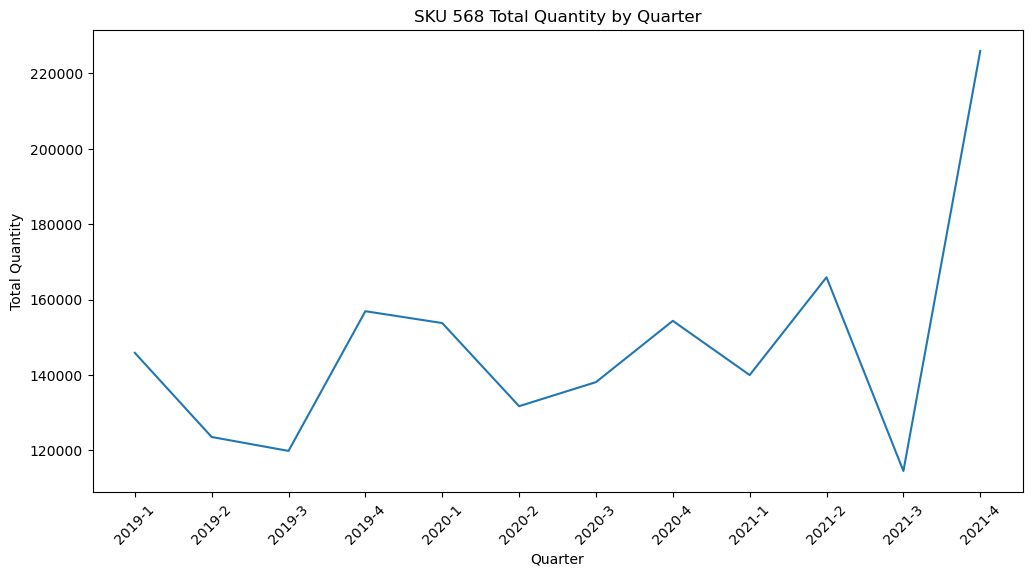

SKU 578
Year  Quarter
2019  1          102933
      2           89753
      3           76777
      4           97961
2020  1           98585
      2           87533
      3           79894
      4           78047
2021  1           91852
      2           81332
      3           60905
      4          109939
Name: TotalQuantity, dtype: int64


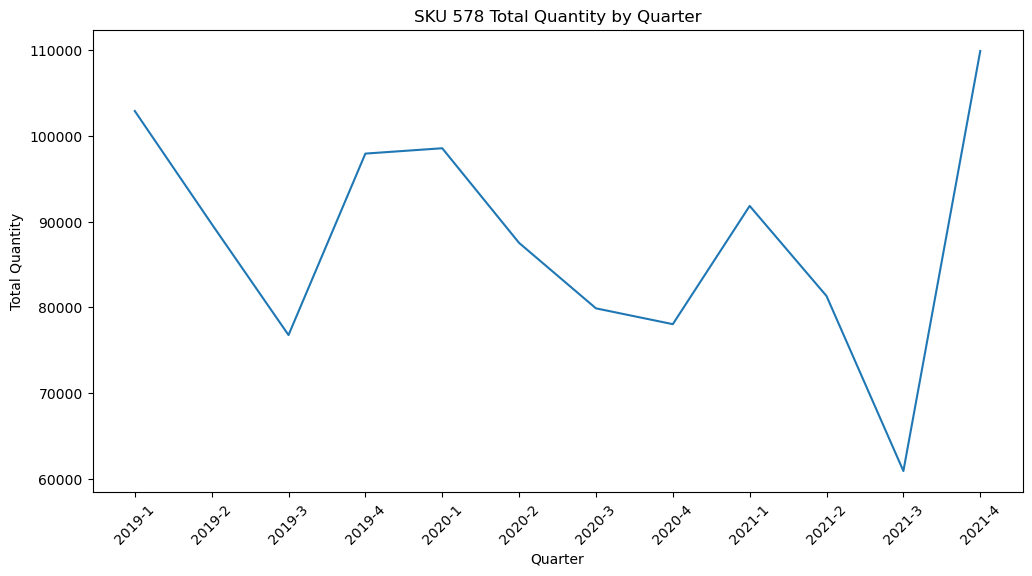

SKU 1050
Year  Quarter
2019  1          52981
      2          46656
      3          60115
      4          75765
2020  1          98657
      2          87386
      3          58010
      4          82377
2021  1          78269
      2          69268
      3          79958
      4          90674
Name: TotalQuantity, dtype: int64


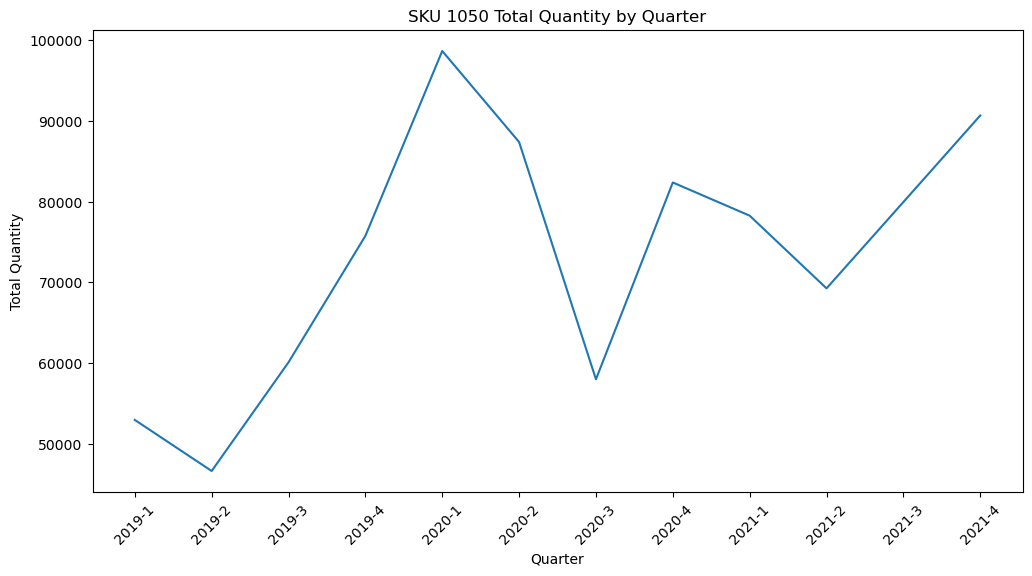

SKU 319
Year  Quarter
2019  1          46823
      2          42588
      3          42818
      4          49943
2020  1          56466
      2          49173
      3          50841
      4          59334
2021  1          62174
      2          53335
      3          52102
      4          76375
Name: TotalQuantity, dtype: int64


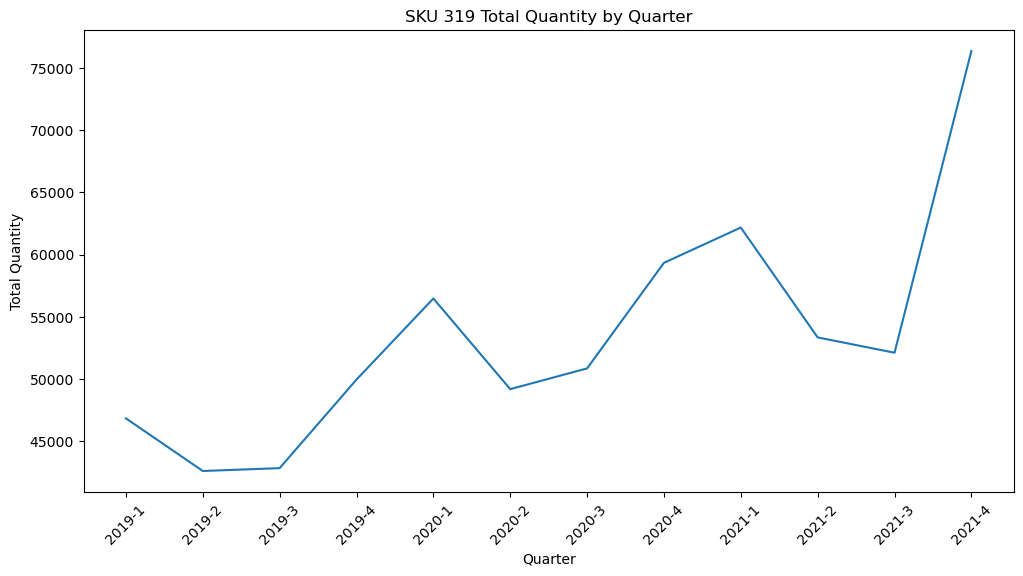

SKU 509
Year  Quarter
2019  1          43084
      2          35255
      3          30328
      4          35910
2020  1          39070
      2          40373
      3          32375
      4          34871
2021  1          38401
      2          32529
      3          30596
      4          36852
Name: TotalQuantity, dtype: int64


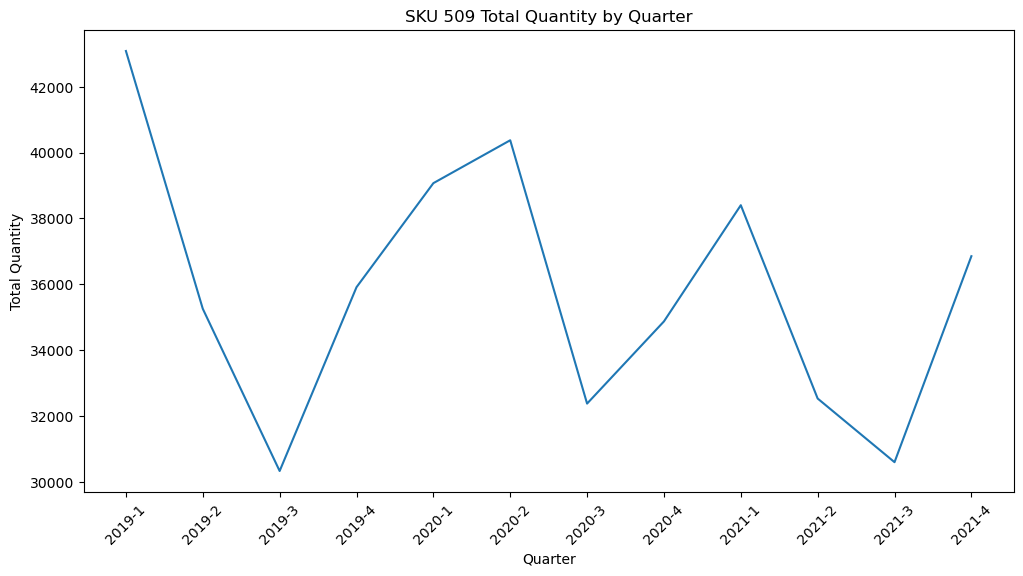

SKU 615
Year  Quarter
2019  1          37197
      2          32159
      3          26647
      4          31652
2020  1          36366
      2          39597
      3          35966
      4          35007
2021  1          39269
      2          32296
      3          27608
      4          36842
Name: TotalQuantity, dtype: int64


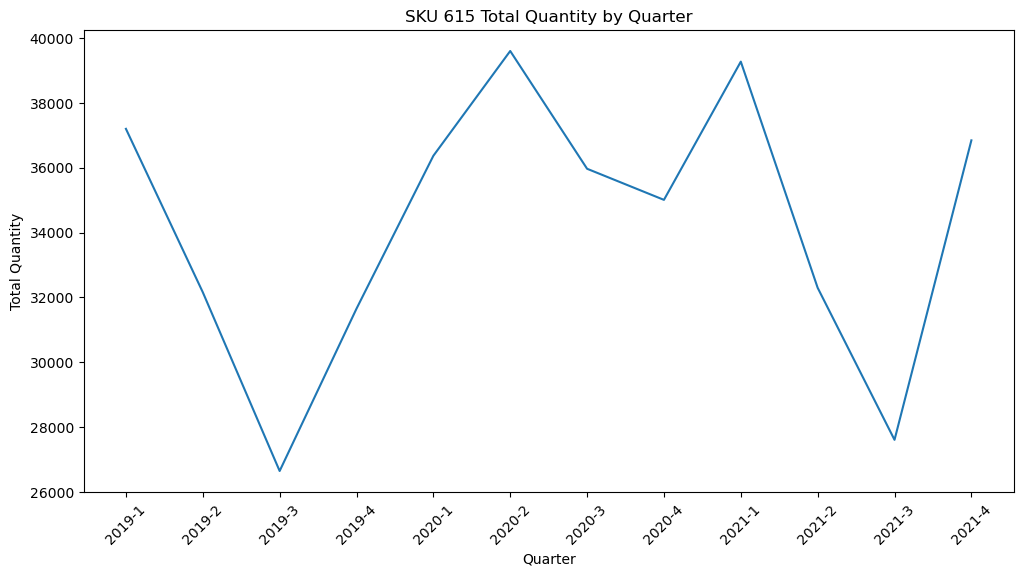

SKU 1018
Year  Quarter
2019  1          13937
      2          12767
      3          11758
      4          14721
2020  1          16743
      2          16719
      3          14319
      4          16976
2021  1          19435
      2          15390
      3          14559
      4          19213
Name: TotalQuantity, dtype: int64


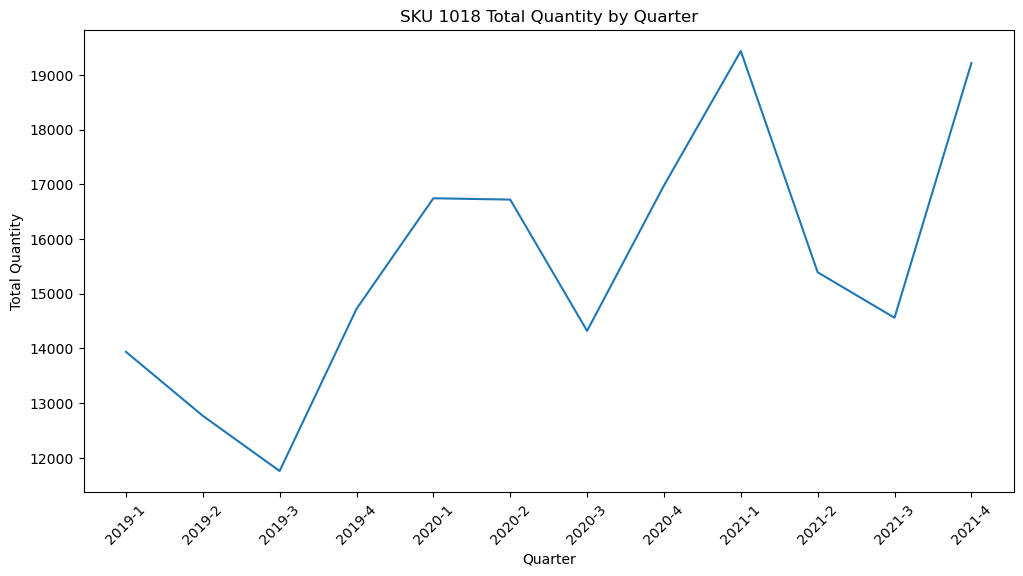

In [94]:
for sku_id in all_sku_ids:
    print(f'SKU {sku_id}')
    sku_data = data[data['SkuID'] == sku_id]
    sku_data.set_index(['Year', 'Quarter'], inplace=True)
    print(sku_data['TotalQuantity'])
    plot_sku(sku_id)

Control these:
- Trend 
- Seasonality
- Cyclical
- Random

SKU 568


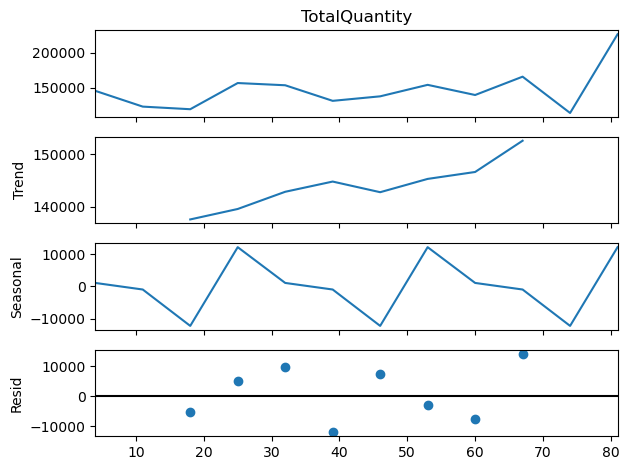

SKU 578


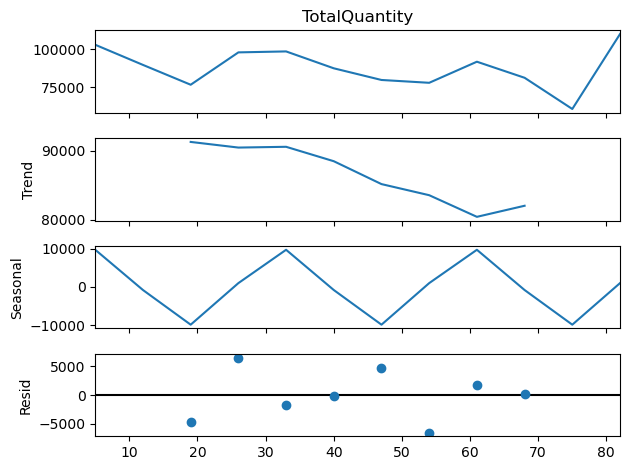

SKU 1050


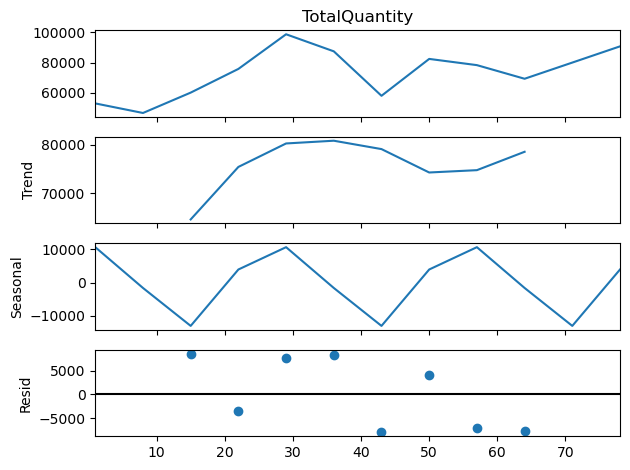

SKU 319


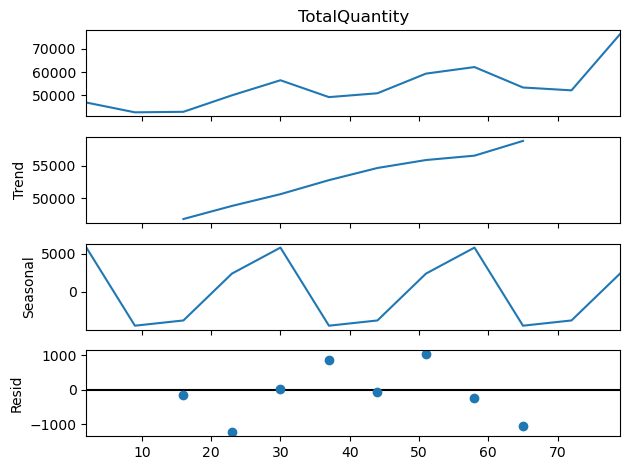

SKU 509


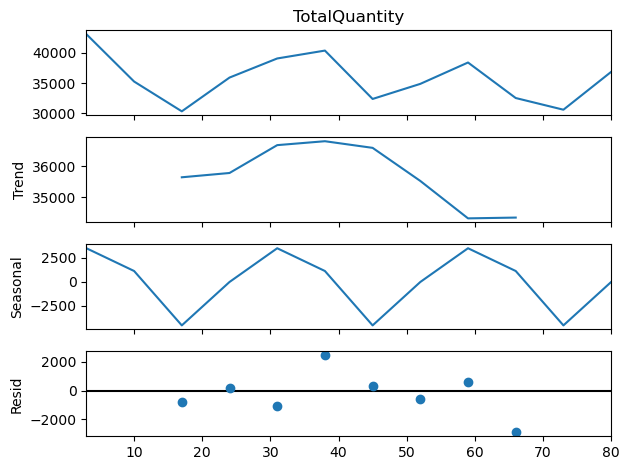

SKU 615


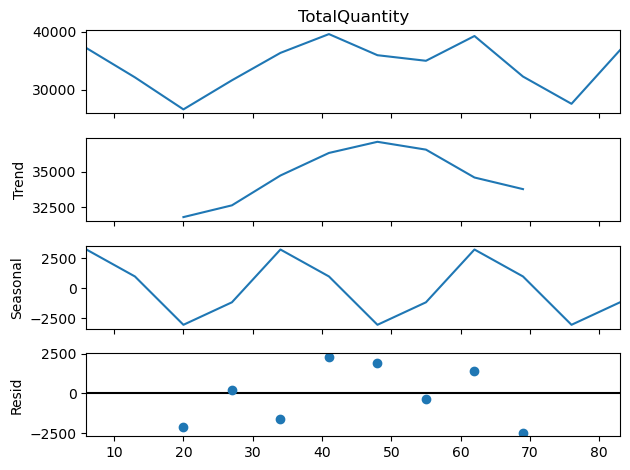

SKU 1018


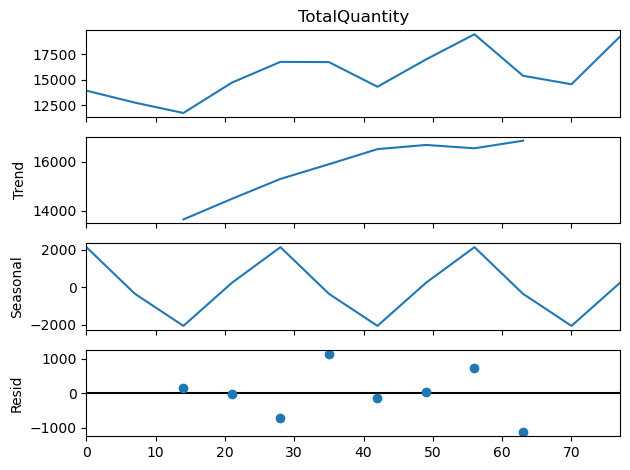

In [70]:
from statsmodels.tsa.seasonal import seasonal_decompose

for sku_id in all_sku_ids:
    print(f'SKU {sku_id}')
    sku_data = data[data['SkuID'] == sku_id]
    result = seasonal_decompose(sku_data['TotalQuantity'], model='additive', period=4)
    result.plot()
    plt.show()

# Forecasting

## Exponential Smoothing

In [71]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing

exponential_smoothing_forecast = []

def forecast_sku_ExponentialSmoothing(sku_id):
    sku_data = data[data['SkuID'] == sku_id]
    train = sku_data['TotalQuantity'][:-4]
    test = sku_data['TotalQuantity'][-4:]
    model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=4).fit()
    forecast = model.forecast(4)
    forecast = forecast.astype(int)
    forecast_table = pd.DataFrame({'Year': [2020, 2020, 2020, 2020], 'Quarter': [1, 2, 3, 4], 'Forecasted': forecast, 'Actual': 
                                test.values, 'Error': test.values - forecast})
    
    forecast_table.set_index(['Year', 'Quarter'], inplace=True)
    
    
    # calculate MAPE, Mean Absolute Percentage Error, it is a measure of prediction accuracy of a forecasting method
    mape = (abs(forecast - test.values) / test.values).mean()
    # calculate MSE, Mean Squared Error, it is a measure of the average of the squares of the errors
    mse = ((forecast - test.values) ** 2).mean()
    # calculate RMSE, Root Mean Squared Error, it is a measure of the average of the squares of the errors
    rmse = mse ** 0.5
    # calculate bias
    bias = (forecast - test.values).mean()
    exponential_smoothing_forecast.append({'sku_id': sku_id, 'mape': round(mape, 3), 'mse': round(mse, 3), 'rmse': round(rmse, 3), 'bias': round(bias, 3)})

    
    print(f'SKU {sku_id} Exponential Smoothing Forecast'f'\n\n{forecast_table}\n')
    print(f'MAPE: {mape}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print('===============\n')

In [72]:
for sku_id in all_sku_ids:
    forecast_sku_ExponentialSmoothing(sku_id)

SKU 568 Exponential Smoothing Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1            152094  139976 -12118
     2            129495  165927  36432
     3            128604  114512 -14092
     4            159160  225966  66806

MAPE: 0.1812115014565409
MSE: 1533940662.0
RMSE: 39165.55453456519

SKU 578 Exponential Smoothing Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1             98056   91852  -6204
     2             85657   81332  -4325
     3             74441   60905 -13536
     4             88908  109939  21031

MAPE: 0.13356632389693576
MSE: 170680374.5
RMSE: 13064.469928014683

SKU 1050 Exponential Smoothing Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1             64242   78269  14027
     2             57915   69268  11353
     3             71369   79958   8589
     4             87021   90674   3653

MAPE: 0.12270524604

/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/ts

In [73]:
exponential_smoothing_forecast = pd.DataFrame(exponential_smoothing_forecast)
exponential_smoothing_forecast.set_index('sku_id', inplace=True)
exponential_smoothing_forecast

,mape,mse,rmse,bias
sku_id,,,,
568,0.181,1.533941e+09,39165.555,-19257.00
578,0.134,1.706804e+08,13064.470,758.50
1050,0.123,1.031907e+08,10158.281,-9405.50
319,0.079,8.609675e+07,9278.834,-5668.25
509,0.060,7.612652e+06,2759.103,1560.00
615,0.124,2.088601e+07,4570.121,2976.75
1018,0.076,2.577900e+06,1605.584,-659.00


## Moving Average

In [74]:
moving_average_forecast = []

def forecast_sku_MovingAverage(sku_id):
    sku_data = data[data['SkuID'] == sku_id]
    train = sku_data['TotalQuantity'][:-4]
    test = sku_data['TotalQuantity'][-4:]
    forecast = train.rolling(window=4).mean().iloc[-4:]
    forecast = forecast.astype(int)
    forecast_table = pd.DataFrame({'Year': [2020, 2020, 2020, 2020], 'Quarter': [1, 2, 3, 4], 'Forecasted': forecast, 'Actual': 
                                test.values, 'Error': test.values - forecast})
    forecast_table.set_index(['Year', 'Quarter'], inplace=True)
    
    
    # calculate MAPE, Mean Absolute Percentage Error, it is a measure of prediction accuracy of a forecasting method
    mape = (abs(forecast - test.values) / test.values).mean()
    # calculate MSE, Mean Squared Error, it is a measure of the average of the squares of the errors
    mse = ((forecast - test.values) ** 2).mean()
    # calculate RMSE, Root Mean Squared Error, it is a measure of the average of the squares of the errors
    rmse = mse ** 0.5
    # calculate bias
    bias = (forecast - test.values).mean()
    moving_average_forecast.append({'sku_id': sku_id, 'mape': round(mape, 3), 'mse': round(mse, 3), 'rmse': round(rmse, 3), 'bias': round(bias, 3)})
    
    print(f'SKU {sku_id} Moving Average Forecast'f'\n\n{forecast_table}\n')
    print(f'MAPE: {mape}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print('===============\n')

In [75]:
for sku_id in all_sku_ids:
    forecast_sku_MovingAverage(sku_id)

SKU 568 Moving Average Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1            138515  139976   1461
     2            140558  165927  25369
     3            145121  114512 -30609
     4            144483  225966  81483

MAPE: 0.1978070086916459
MSE: 2055527713.0
RMSE: 45337.92797426896

SKU 578 Moving Average Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1             90769   91852   1083
     2             90214   81332  -8882
     3             90993   60905 -30088
     4             86014  109939  23925

MAPE: 0.20815834133434688
MSE: 389439045.5
RMSE: 19734.21002979344

SKU 1050 Moving Average Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1             70298   78269   7971
     2             80480   69268 -11212
     3             79954   79958      4
     4             81607   90674   9067

MAPE: 0.09093769139489737
MSE: 67864072.5

In [76]:
moving_average_forecast = pd.DataFrame(moving_average_forecast)
moving_average_forecast.set_index('sku_id', inplace=True)
moving_average_forecast

,mape,mse,rmse,bias
sku_id,,,,
568,0.198,2.055528e+09,45337.928,-19426.00
578,0.208,3.894390e+08,19734.210,3490.50
1050,0.091,6.786407e+07,8237.965,-1457.50
319,0.150,1.797950e+08,13408.767,-10218.75
509,0.104,1.648782e+07,4060.520,1696.50
615,0.134,3.187384e+07,5645.692,471.25
1018,0.134,1.000420e+07,3162.942,-1950.25


In [77]:
naive_forecast = []

def forecast_sku_Naive(sku_id):
    sku_data = data[data['SkuID'] == sku_id]
    train = sku_data['TotalQuantity'][:-4]
    test = sku_data['TotalQuantity'][-4:]
    forecast = train.iloc[-1]
    forecast = forecast.astype(int)
    forecast_table = pd.DataFrame({'Year': [2020, 2020, 2020, 2020], 'Quarter': [1, 2, 3, 4], 'Forecasted': forecast, 'Actual': 
                                test.values, 'Error': test.values - forecast})
    
    forecast_table.set_index(['Year', 'Quarter'], inplace=True)
    
    
    # calculate MAPE, Mean Absolute Percentage Error, it is a measure of prediction accuracy of a forecasting method
    mape = (abs(forecast - test.values) / test.values).mean()
    # calculate MSE, Mean Squared Error, it is a measure of the average of the squares of the errors
    mse = ((forecast - test.values) ** 2).mean()
    # calculate RMSE, Root Mean Squared Error, it is a measure of the average of the squares of the errors
    rmse = mse ** 0.5
    # calculate bias
    bias = (forecast - test.values).mean()
    naive_forecast.append({'sku_id': sku_id, 'mape': round(mape, 3), 'mse': round(mse, 3), 'rmse': round(rmse, 3), 'bias': round(bias, 3)})
    
    
    print(f'SKU {sku_id} Naive Forecast'f'\n\n{forecast_table}\n')
    print(f'MAPE: {mape}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print('===============\n')
    

In [78]:
for sku_id in all_sku_ids:
    forecast_sku_Naive(sku_id)

SKU 568 Naive Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1            154361  139976 -14385
     2            154361  165927  11566
     3            154361  114512 -39849
     4            154361  225966  71605

MAPE: 0.20933666399672202
MSE: 1763979851.75
RMSE: 41999.760139196034

SKU 578 Naive Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1             78047   91852  13805
     2             78047   81332   3285
     3             78047   60905 -17142
     4             78047  109939  31892

MAPE: 0.19055724982646027
MSE: 378079269.5
RMSE: 19444.26057992435

SKU 1050 Naive Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1             82377   78269  -4108
     2             82377   69268 -13109
     3             82377   79958  -2419
     4             82377   90674   8297

MAPE: 0.09087327934514079
MSE: 65853328.75
RMSE: 8115.00639248053

In [79]:
naive_forecast = pd.DataFrame(naive_forecast)
naive_forecast.set_index('sku_id', inplace=True)
naive_forecast

,mape,mse,rmse,bias
sku_id,,,,
568,0.209,1.763980e+09,41999.760,-7234.25
578,0.191,3.780793e+08,19444.261,-7960.00
1050,0.091,6.585333e+07,8115.006,2834.75
319,0.130,9.668778e+07,9832.994,-1662.50
509,0.089,1.003646e+07,3168.038,276.50
615,0.128,2.090665e+07,4572.379,1003.25
1018,0.128,4.852034e+06,2202.733,-173.25


## Seasonal Forecasting Methods

There are seasonal patterns in the data. So, we can use forecasting methods that can capture the seasonality.
- Triple Exponential Smoothing
- ARIMA
- SARIMA

### Triple Exponential Smoothing

In [80]:
triple_exponential_smoothing_forecast = []

def forecast_sku_TripleExponentialSmoothing(sku_id):
    sku_data = data[data['SkuID'] == sku_id]
    train = sku_data['TotalQuantity'][:-4]
    test = sku_data['TotalQuantity'][-4:]
    model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=4, trend='add').fit()
    forecast = model.forecast(4)
    forecast = forecast.astype(int)
    forecast_table = pd.DataFrame({'Year': [2020, 2020, 2020, 2020], 'Quarter': [1, 2, 3, 4], 'Forecasted': forecast, 'Actual': 
                                test.values, 'Error': test.values - forecast})
    
    forecast_table.set_index(['Year', 'Quarter'], inplace=True)
    
    
    # calculate MAPE, Mean Absolute Percentage Error, it is a measure of prediction accuracy of a forecasting method
    mape = (abs(forecast - test.values) / test.values).mean()
    # calculate MSE, Mean Squared Error, it is a measure of the average of the squares of the errors
    mse = ((forecast - test.values) ** 2).mean()
    # calculate RMSE, Root Mean Squared Error, it is a measure of the average of the squares of the errors
    rmse = mse ** 0.5
    # calculate bias
    bias = (forecast - test.values).mean()
    triple_exponential_smoothing_forecast.append({'sku_id': sku_id, 'mape': round(mape, 3), 'mse': round(mse, 3), 'rmse': round(rmse, 3), 'bias': round(bias, 3)})
    
    print(f'SKU {sku_id} Triple Exponential Smoothing Forecast'f'\n\n{forecast_table}\n')
    print(f'MAPE: {mape}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print('===============\n')

    

In [81]:
for sku_id in all_sku_ids:
    forecast_sku_TripleExponentialSmoothing(sku_id)

/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/ts

SKU 568 Triple Exponential Smoothing Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1            161709  139976 -21733
     2            139646  165927  26281
     3            145978  114512 -31466
     4            172791  225966  53175

MAPE: 0.20593942569113707
MSE: 1245176007.75
RMSE: 35287.05155931847

SKU 578 Triple Exponential Smoothing Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1             94644   91852  -2792
     2             81172   81332    160
     3             68392   60905  -7487
     4             87178  109939  22761

MAPE: 0.09058152837787799
MSE: 145484788.5
RMSE: 12061.70752837259

SKU 1050 Triple Exponential Smoothing Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1            121266   78269 -42997
     2            109904   69268 -40636
     3             80652   79958   -694
     4            121213   90674 -3053

/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/ts

In [82]:
triple_exponential_smoothing_forecast = pd.DataFrame(triple_exponential_smoothing_forecast)
triple_exponential_smoothing_forecast.set_index('sku_id', inplace=True)
triple_exponential_smoothing_forecast

,mape,mse,rmse,bias
sku_id,,,,
568,0.206,1.245176e+09,35287.052,-6564.25
578,0.091,1.454848e+08,12061.708,-3160.50
1050,0.370,1.108285e+09,33290.910,28716.50
319,0.079,4.621449e+07,6798.124,-2875.50
509,0.075,1.094344e+07,3308.086,2549.00
615,0.164,3.077551e+07,5547.568,5286.00
1018,0.085,2.727552e+06,1651.530,916.75


### ARIMA

In [83]:
from statsmodels.tsa.arima.model import ARIMA

arima_forecast = []

def forecast_sku_ARIMA(sku_id):
    sku_data = data[data['SkuID'] == sku_id]
    train = sku_data['TotalQuantity'][:-4]
    test = sku_data['TotalQuantity'][-4:]
    model = ARIMA(train, order=(1, 1, 1)).fit()
    forecast = model.forecast(steps=4)
    forecast = forecast.astype(int)
    forecast_table = pd.DataFrame({'Year': [2020, 2020, 2020, 2020], 'Quarter': [1, 2, 3, 4], 'Forecasted': forecast, 'Actual': 
                                test.values, 'Error': test.values - forecast})
    forecast_table.set_index(['Year', 'Quarter'], inplace=True)
    
    # calculate MAPE, Mean Absolute Percentage Error, it is a measure of prediction accuracy of a forecasting method
    mape = (abs(forecast - test.values) / test.values).mean()
    # calculate MSE, Mean Squared Error, it is a measure of the average of the squares of the errors
    mse = ((forecast - test.values) ** 2).mean()
    # calculate RMSE, Root Mean Squared Error, it is a measure of the average of the squares of the errors
    rmse = mse ** 0.5
    # calculate bias
    bias = (forecast - test.values).mean()
    arima_forecast.append({'sku_id': sku_id, 'mape': round(mape, 3), 'mse': round(mse, 3), 'rmse': round(rmse, 3), 'bias': round(bias, 3)})
    
    print(f'SKU {sku_id} ARIMA Forecast'f'\n\n{forecast_table}\n')
    print(f'MAPE: {mape}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print('===============\n')
    

In [84]:
for sku_id in all_sku_ids:
    forecast_sku_ARIMA(sku_id)

/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: N

SKU 568 ARIMA Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1            151601  139976 -11625
     2            151457  165927  14470
     3            151450  114512 -36938
     4            151449  225966  74517

MAPE: 0.20564916010672687
MSE: 1815430164.5
RMSE: 42607.86505447087

SKU 578 ARIMA Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1             79021   91852  12831
     2             79245   81332   2087
     3             79296   60905 -18391
     4             79308  109939  30631

MAPE: 0.18648314624826967
MSE: 361369293.0
RMSE: 19009.715752740754

SKU 1050 ARIMA Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1             80114   78269  -1845
     2             80143   69268 -10875
     3             80142   79958   -184
     4             80142   90674  10532

MAPE: 0.07475625801232283
MSE: 58156632.5
RMSE: 7626.049599891152


In [85]:
arima_forecast = pd.DataFrame(arima_forecast)
arima_forecast.set_index('sku_id', inplace=True)
arima_forecast

,mape,mse,rmse,bias
sku_id,,,,
568,0.206,1.815430e+09,42607.865,-10106.00
578,0.186,3.613693e+08,19009.716,-6789.50
1050,0.075,5.815663e+07,7626.050,593.00
319,0.128,1.000076e+08,10000.378,-2469.75
509,0.088,1.961854e+07,4429.282,-3246.00
615,0.121,1.885622e+07,4342.375,-714.75
1018,0.125,5.015902e+06,2239.621,-480.75


### SARIMA

In [86]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_forecast = []

def forecast_sku_SARIMA(sku_id):
    sku_data = data[data['SkuID'] == sku_id]
    train = sku_data['TotalQuantity'][:-4]
    test = sku_data['TotalQuantity'][-4:]
    model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 4)).fit()
    forecast = model.forecast(steps=4)
    forecast = forecast.astype(int)
    forecast_table = pd.DataFrame({'Year': [2020, 2020, 2020, 2020], 'Quarter': [1, 2, 3, 4], 'Forecasted': forecast, 'Actual': 
                                test.values, 'Error': test.values - forecast})
    forecast_table.set_index(['Year', 'Quarter'], inplace=True)
    
    # calculate MAPE, Mean Absolute Percentage Error, it is a measure of prediction accuracy of a forecasting method
    mape = (abs(forecast - test.values) / test.values).mean()
    # calculate MSE, Mean Squared Error, it is a measure of the average of the squares of the errors
    mse = ((forecast - test.values) ** 2).mean()
    # calculate RMSE, Root Mean Squared Error, it is a measure of the average of the squares of the errors
    rmse = mse ** 0.5
    # calculate bias
    bias = (forecast - test.values).mean()
    
    # store the SARIMA forecast values in the sarima_forecast table to compare with other forecasting methods
    sarima_forecast.append({'sku_id': sku_id, 'mape': round(mape, 3), 'mse': round(mse, 3), 'rmse': round(rmse, 3), 'bias': round(bias, 3)})
    print('===============\n')
    print(f'SKU {sku_id} ARIMA Forecast'f'\n\n{forecast_table}\n')
    print(f'MAPE: {mape}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print('===============\n')


In [87]:
for sku_id in all_sku_ids:
    forecast_sku_SARIMA(sku_id)
    

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.10786D+00    |proj g|=  8.11347D-01

At iterate    5    f=  3.88460D+00    |proj g|=  6.49146D-02

At iterate   10    f=  3.84702D+00    |proj g|=  7.28310D-02

At iterate   15    f=  3.84303D+00    |proj g|=  1.20687D-02

At iterate   20    f=  3.84285D+00    |proj g|=  1.89468D-03

At iterate   25    f=  3.84283D+00    |proj g|=  3.31901D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     29      1     0     0   

/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observatio

At iterate   10    f=  3.83658D+00    |proj g|=  1.57613D-02

At iterate   15    f=  3.83577D+00    |proj g|=  4.73304D-04

At iterate   20    f=  3.83577D+00    |proj g|=  4.61188D-05


/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/senaoz/anaconda3/l


At iterate   25    f=  3.83576D+00    |proj g|=  8.83069D-04

At iterate   30    f=  3.83549D+00    |proj g|=  1.87745D-02

At iterate   35    f=  3.81099D+00    |proj g|=  1.95855D-01

At iterate   40    f=  3.62970D+00    |proj g|=  3.92799D-01

At iterate   45    f=  3.27727D+00    |proj g|=  8.96225D-01

At iterate   50    f=  3.20973D+00    |proj g|=  1.55150D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     72      1     0     0   1.551D-02   3.210D+00
  F =   3.2097298686842031     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

SKU 578 ARIMA Forecast

              Forecasted  

/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/senaoz/anaconda3/lib/python3.11/site-p


At iterate   25    f=  3.16580D+00    |proj g|=  4.71292D-03

At iterate   30    f=  3.16580D+00    |proj g|=  3.54749D-04

At iterate   35    f=  3.16579D+00    |proj g|=  1.20881D-02

At iterate   40    f=  3.16434D+00    |proj g|=  1.16118D-01

At iterate   45    f=  3.16189D+00    |proj g|=  3.92484D-02

At iterate   50    f=  3.10161D+00    |proj g|=  4.25418D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     58      1     0     0   4.254D-01   3.102D+00
  F =   3.1016053786024158     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

SKU 319 ARIMA Forecast

              Forecasted  

/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/senaoz/anaconda3/lib/python3.11/site-p

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.80597D+00    |proj g|=  1.19854D+00

At iterate    5    f=  3.58741D+00    |proj g|=  4.90794D-02

At iterate   10    f=  3.55947D+00    |proj g|=  4.45427D-03

At iterate   15    f=  3.55942D+00    |proj g|=  1.22421D-04

At iterate   20    f=  3.55942D+00    |proj g|=  7.84486D-04

At iterate   25    f=  3.55933D+00    |proj g|=  9.45795D-03

At iterate   30    f=  3.55530D+00    |proj g|=  4.92202D-02


/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(



At iterate   35    f=  3.45313D+00    |proj g|=  9.11218D-02

At iterate   40    f=  3.00411D+00    |proj g|=  1.30454D-01

At iterate   45    f=  2.99545D+00    |proj g|=  2.40050D-01

At iterate   50    f=  2.96271D+00    |proj g|=  1.40652D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     72      1     0     0   1.407D-01   2.963D+00
  F =   2.9627149244760700     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

SKU 615 ARIMA Forecast

              Forecasted  Actual  Error
Year Quarter                           
2020 1             53288   39269 -14019
     2             50934   322

/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/senaoz/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observatio

In [88]:
sarima_forecast = pd.DataFrame(sarima_forecast)
sarima_forecast.set_index('sku_id', inplace=True)
sarima_forecast

,mape,mse,rmse,bias
sku_id,,,,
568,0.407,4.154596e+09,64456.156,53753.50
578,0.699,3.414105e+09,58430.342,55476.25
1050,0.758,3.615398e+09,60128.183,59987.75
319,0.126,1.075144e+08,10368.917,-8360.50
509,0.244,7.613258e+07,8725.398,8373.25
615,0.486,2.600438e+08,16125.873,15970.75
1018,0.161,8.812714e+06,2968.622,2536.25


## Comparison of Forecasting Methods

### Bias = (Actual - Forecasted) / n 
 Bias is the average of the differences between the forecasted values and the actual values. It is a measure of the accuracy of the forecasting method. The closer the bias value is to zero, the more accurate the forecasting method is.


In [89]:
all_forecasts_bias = pd.concat([exponential_smoothing_forecast['bias'], moving_average_forecast['bias'], naive_forecast['bias'], triple_exponential_smoothing_forecast['bias'], arima_forecast['bias'], sarima_forecast['bias']], axis=1)
all_forecasts_bias.columns = ['Exponential Smoothing', 'Moving Average', 'Naive', 'Triple Exponential Smoothing', 'ARIMA', 'SARIMA']
all_forecasts_bias

,Exponential Smoothing,Moving Average,Naive,Triple Exponential Smoothing,ARIMA,SARIMA
sku_id,,,,,,
568,-19257.00,-19426.00,-7234.25,-6564.25,-10106.00,53753.50
578,758.50,3490.50,-7960.00,-3160.50,-6789.50,55476.25
1050,-9405.50,-1457.50,2834.75,28716.50,593.00,59987.75
319,-5668.25,-10218.75,-1662.50,-2875.50,-2469.75,-8360.50
509,1560.00,1696.50,276.50,2549.00,-3246.00,8373.25
615,2976.75,471.25,1003.25,5286.00,-714.75,15970.75
1018,-659.00,-1950.25,-173.25,916.75,-480.75,2536.25


<Figure size 1200x600 with 0 Axes>

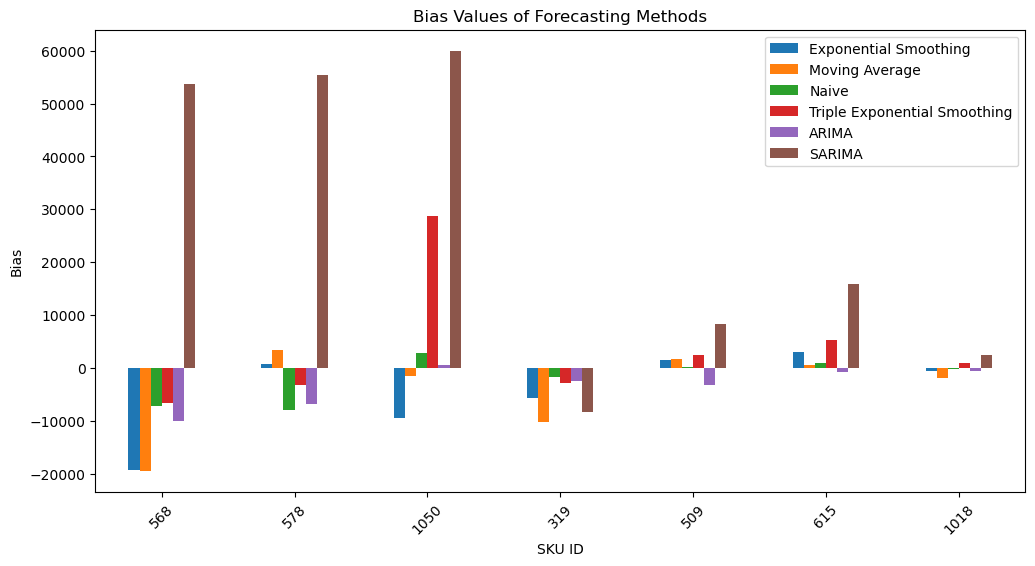

In [96]:
# Plot bias values of the forecasting methods
plt.figure(figsize=(12, 6))
all_forecasts_bias.plot(kind='bar', figsize=(12, 6))
plt.title('Bias Values of Forecasting Methods')
plt.xlabel('SKU ID')
plt.ylabel('Bias')
plt.xticks(rotation=45)
plt.show()


### MAPE = (|Actual - Forecasted| / Actual) / n

MAPE is the average of the absolute percentage differences between the forecasted values and the actual values. It is a measure of the prediction accuracy of a forecasting method. The lower the MAPE value, the more accurate the forecasting method is.

In [90]:
all_forecasts_mape = pd.concat([exponential_smoothing_forecast['mape'], moving_average_forecast['mape'], naive_forecast['mape'], triple_exponential_smoothing_forecast['mape'], arima_forecast['mape'], sarima_forecast['mape']], axis=1)
all_forecasts_mape.columns = ['Exponential Smoothing', 'Moving Average', 'Naive', 'Triple Exponential Smoothing', 'ARIMA', 'SARIMA']
all_forecasts_mape

,Exponential Smoothing,Moving Average,Naive,Triple Exponential Smoothing,ARIMA,SARIMA
sku_id,,,,,,
568,0.181,0.198,0.209,0.206,0.206,0.407
578,0.134,0.208,0.191,0.091,0.186,0.699
1050,0.123,0.091,0.091,0.370,0.075,0.758
319,0.079,0.150,0.130,0.079,0.128,0.126
509,0.060,0.104,0.089,0.075,0.088,0.244
615,0.124,0.134,0.128,0.164,0.121,0.486
1018,0.076,0.134,0.128,0.085,0.125,0.161


<Figure size 1200x600 with 0 Axes>

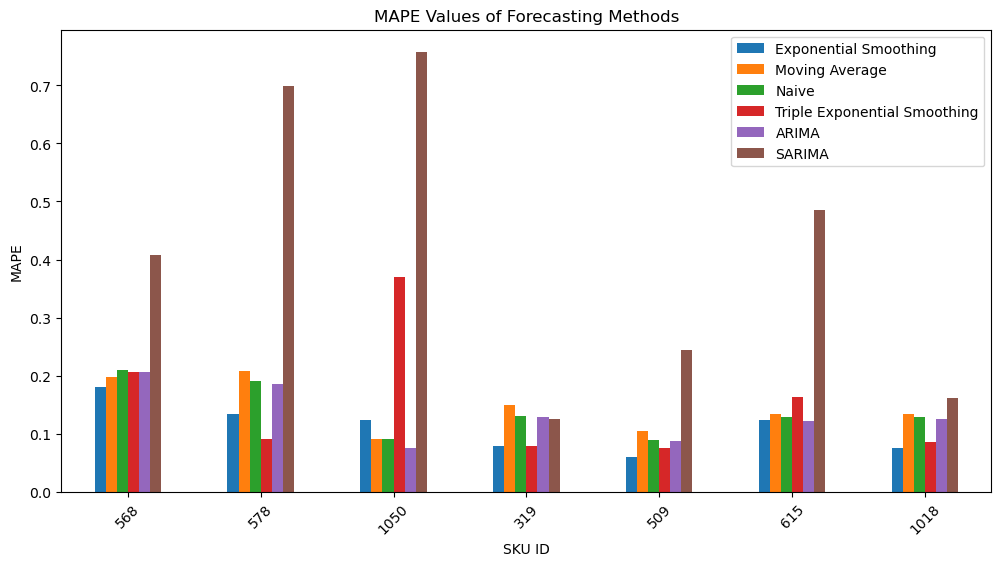

In [95]:
# Plot MAPE values of the forecasting methods
plt.figure(figsize=(12, 6))
all_forecasts_mape.plot(kind='bar', figsize=(12, 6))
plt.title('MAPE Values of Forecasting Methods')
plt.xlabel('SKU ID')
plt.ylabel('MAPE')
plt.xticks(rotation=45)
plt.show()